<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##*Lab 4*: CART

###**Tenggat Waktu: 8 Oktober 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab4_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **8 Oktober 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [253]:
# Isi dengan data diri Anda
NAMA = "Alvaro Austin"
NAMA_TEAM_KAGGLE = "AlvaroAustin"
KELAS = "B"
NPM = "2106752180"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [208]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Alvaro Austin dari kelas B dengan NPM 2106752180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Alvaro Austin)


## Deskripsi Dataset

Lab ini akan menggunakan 2 dataset, yakni dataset untuk klasifikasi dan dataset untuk regresi.

Dataset yang digunakan untuk klasifikasi adalah dataset **Red Wine Quality** (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) dengan modifikasi.

Dataset yang akan digunakan untuk regresi adalah dataset **Graduate Admission 2** (https://www.kaggle.com/datasets/mohansacharya/graduate-admissions) dengan modifikasi.

### Deskripsi Dataset Klasifikasi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap kualitas dari suatu Red Wine yang diukur dengan angka 0 sampai dengan 10 (Quality).

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:


*   **Fixed Acidity**: Sebagian besar asam yang terlibat dalam anggur adalah asam tetap atau tidak mudah menguap (tidak menguap dengan mudah).
*   **Volatile Acidity**: Jumlah asam asetat dalam anggur, yang pada kadar yang terlalu tinggi dapat menyebabkan rasa cuka yang tidak enak.
*   **Citric Acid**: Ditemukan dalam jumlah kecil, asam sitrat dapat menambahkan 'kesegaran' dan rasa pada anggur.
*   **Residual Sugar**: Jumlah gula yang tersisa setelah fermentasi berhenti.
*   **Chlorides**: Jumlah kadar garam pada wine.
*   **Free Sulfur Dioxide**: Bentuk bebas SO2 ada dalam keseimbangan antara SO2 molekuler (sebagai gas terlarut) dan ion bisulfit.
*   **Total Sulfur Dioxide**: Jumlah bentuk bebas dan terikat dari SO2.
*   **Density**: Kepadatan air tergantung pada persentase alkohol dan kandungan gula.
*   **pH**: Menggambarkan seberapa asam atau basa suatu anggur pada skala dari 0 (sangat asam) hingga 14 (sangat basa).
*   **Sulphates**: Sebuah tambahan untuk anggur yang dapat berkontribusi pada tingkat gas sulfur dioksida (SO2).
*   **Alcohol**: Persentase kandungan alkohol dalam anggur.
*   **Quality**: Variabel keluaran (berdasarkan data sensori, skor antara 0 dan 10).









### Deskripsi Dataset Regresi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap besarnya peluang (Chance of Admit) dari seorang pelamar untuk diterima pada program Magister-nya di daerah India.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:



*   **GRE Scores (out of 340)**: Skor yang diperoleh oleh calon pelamar pada tes GRE.
*   **TOEFL Scores (out of 120)**: Skor yang diperoleh oleh calon pelamar pada tes TOEFL.
*   **University Rating (out of 5)**: Rating universitas yang didaftar oleh calon pelamar.
*  **Statement of Purpose and Letter of Recommendation Strength (out of 5)**: Skor yang diperoleh dari surat rekomendasi yang dilampirkan oleh calon pelamar.
*   **Undergraduate GPA (out of 10)**: GPA yang diperoleh oleh calon pelamar pada saat masa *undergraduate*.
*   **Research Experience (either 0 or 1)**: Ada/tidaknya pengalaman meneliti yang dimiliki oleh calon pelamar. 0 berarti tidak, 1 berarti iya.
*   **Chance of Admit (ranging from 0 to 1)**: Peluang diterimanya calon pelamar pada suatu universitas dengan skor-skor yang dimilikinya.

## Import Libraries

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns

## Read Datasets

**Bacalah konten dari masing-masing dataset yang telah disediakan. Perhatikan tipe data dari masing-masing kolom, apakah sudah cocok untuk dijadikan input ke dalam model atau tidak.**

### Dataset Red Wine

**Terapkan proses Read Dataset di bawah cell ini**

In [210]:
df_wine = pd.read_csv("Red_Wine_Quality_Train.csv")

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.200000,0.450000,0.490000,1.400000,0.075000,3.000000,6.000000,0.996900,3.130000,0.630000,10.400000,5
1,7.100000,0.430000,0.170000,1.800000,0.082000,27.000000,51.000000,0.996340,3.490000,0.640000,10.400000,5
2,7.784053,0.280000,0.303572,1.993696,0.061832,17.978987,33.957974,0.995235,3.277268,0.895167,11.285291,7
3,7.960832,0.762917,0.015375,2.490418,0.085412,13.341669,26.512503,0.997363,3.376833,0.470250,9.856252,4
4,7.700000,0.705000,0.100000,2.600000,0.084000,9.000000,26.000000,0.997600,3.390000,0.490000,9.700000,5


### Dataset Admission Prediction

**Terapkan proses Read Dataset di bawah cell ini**

In [211]:
df_admission = pd.read_csv("Admission_Prediction_Train.csv")

df_admission.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,5,6,330,115,5,4.5,3.0,9.34,1,0.90
1,116,117,299,102,3,4.0,3.5,8.62,0,0.56
2,45,46,322,110,5,5.0,4.0,9.10,1,0.88
3,16,17,317,107,3,4.0,3.0,8.70,0,0.66
4,462,463,307,105,4,3.0,3.0,7.94,0,0.62


## SOAL 1 Data Pre-processing [20]

**Terapkanlah proses data pre-processing pada bagian ini agar dataset yang telah diberikan dapat dijadikan input dari model yang akan kalian buat. Terapkan proses tersebut untuk masing-masing dataset (Red Wine & Admission Prediction) hingga dataset terbagi menjadi train dan test**

In [212]:
# Function to remove outlier

def remove_outlier_on_df(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
  q_low = df[column_name].quantile(0.01)
  q_hi  = df[column_name].quantile(0.99)

  df = df[(df[column_name] < q_hi) & (df[column_name] > q_low)]
  return df

### Dataset Red Wine

**Terapkan proses data pre-processing di bawah cell ini**

In [213]:
# Data Cleaning

print("Baris dengan atribut kosong: \n", df_wine.isna().sum()) # Karena tidak ada data yang kosong maka tidak perlu dilakukan proses data imputation (namun dapat di drop saja (walaupun tidak ada pengaruh))

df_wine.dropna(inplace=True)

df_wine.drop_duplicates(inplace=True)


## ------------  Remove Outlier ---------- ##

# Remove Outlier on Sulphates
# df_wine = remove_outlier_on_df(df_wine, "alcohol")

## -------------------------------------- ##

# Data Selection (Dependent vs Independent)

# Kita tahu bahwa dependent variable disini adalah Quality, dan hasil sisanya adalah independent variable.

# Red Wine
X_red = df_wine.iloc[:,:-1] # Independent
Y_red = df_wine.iloc[:,11] # Dependent
# Splitting dataset to train or test

X_red_train, X_red_test, Y_red_train, Y_red_test = train_test_split(X_red, Y_red, test_size= 0.2, random_state=1)

Baris dengan atribut kosong: 
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Dataset Admission Prediction

**Terapkan proses data pre-processing di bawah cell ini**

In [214]:
# Data Cleaning

print("Baris dengan atribut kosong: \n", df_admission.isna().sum())

df_admission.dropna(inplace=True)

df_admission.drop_duplicates(inplace=True)

## ------------  Remove Outlier ---------- ##

# Remove Outlier on CGPA
# df_admission = remove_outlier_on_df(df_admission, "CGPA")

## -------------------------------------- ##

# Kita tahu bahwa dependent variable disini adalah Quality, dan hasil sisanya adalah independent variable.

# Admission
X_admission = df_admission.iloc[:,2:-1] # Independent
Y_admission = df_admission.iloc[:,9] # Dependent

# Splitting dataset to train or test

X_admission_train, X_admission_test, Y_admission_train, Y_admission_test = train_test_split(X_admission, Y_admission, test_size= 0.2, random_state=1)

Baris dengan atribut kosong: 
 Unnamed: 0           0
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


## CART (Classification and Regression Tree)

### Decision Tree

Decision Tree merupakan model yang beroperasi dengan struktur berbentuk Binary Tree, di mana setiap node hanya dapat memiliki dua child node paling banyak. Dalam bidang data science, model ini diterapkan dalam konteks Supervised Learning, yaitu model dibentuk berdasarkan data training dan selanjutnya digunakan untuk membuat prediksi terhadap data yang disajikan. Data training yang digunakan akan diolah menjadi sebuah rangkaian aturan dalam bentuk Binary Tree. Aturan-aturan ini selanjutnya digunakan untuk proses prediksi pada dataset lain.

#### Training

Function di bawah ini merupakan function yang dapat digunakan untuk menghitung metrics hasil testing, baik untuk kasus regresi, maupun kasus klasifikasi.

In [215]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [216]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))


##### Dataset Red Wine

In [217]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtc_red = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc_red.fit(X_red_train, Y_red_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

##### Dataset Admission Prediction

In [218]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtr_admission = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr_admission.fit(X_admission_train, Y_admission_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

#### Evaluation

##### Dataset Red Wine

In [219]:
# Memprediksi data testing
prediction = dtc_red.predict(X_red_test)

# Call the metrics function
classification_metrics(prediction, Y_red_test)

Accuracy: 0.49612403100775193
F1 Score: 0.38932529664082116
Recall Score: 0.4729628736740598
Precision Score: 0.4188929915453596


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Dataset Admission Prediction

In [220]:
# Memprediksi data testing
prediction = dtr_admission.predict(X_admission_test)

# Call the metrics function
regression_metrics(prediction, Y_admission_test)

MAE: 0.05969194355708387
MSE: 0.005599482816749552
RMSE: 0.07482969207974567
R_squared: 0.5545497143095808


#### Hyperparameter


Hyperparameter adalah parameter yang dapat kita sesuaikan atau konfigurasi sebelum memulai proses pembangunan model. Tujuan dari penyesuaian ini adalah untuk mengoptimalisasi performa model sehingga diharapkan dapat berfungsi lebih efektif.

> Ada beberapa jenis hyperparameter yang terdapat dalam beragam algoritma machine learning, termasuk dalam algoritma Decision Tree. Beberapa hyperparameter yang ada dalam algoritma Decision Tree yang disediakan oleh modul sklearn.tree antara lain:

- `criterion`: Metrik yang digunakan untuk mengevaluasi kualitas pemisahan node, contohnya:
- `squared_error`: menggunakan reduksi varians sebagai kriteria seleksi fitur dan meminimalkan kerugian L2 dengan menggunakan mean dari setiap node terminal
- `friedman_mse`: menghitung mean squared error dengan Friedman's improvement score untuk kemungkinan pemisahan (tidak perlu khawatir, ini tidak akan keluar di ujian)
- `absolute_error`: meminimalkan kerugian L1 dengan menggunakan median dari setiap node terminal
- `poisson`: memanfaatkan reduksi dalam Poisson deviance untuk menentukan pemisahan
- `max_depth`: Membatasi kedalaman maksimum dari pohon
- `min_samples_split`: Menentukan jumlah minimum sampel yang dibutuhkan untuk memecah sebuah node internal
Untuk informasi lebih detail, Anda bisa merujuk pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [221]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=3
dtr_md6 = DecisionTreeRegressor(max_depth=6, random_state=42)
dtr_md6.fit(X_admission_train, Y_admission_train)

# Memprediksi data testing
predicted6 = dtr_md6.predict(X_admission_test)

# Menampilkan metrics evaluasi
regression_metrics(predicted6, Y_admission_test)

MAE: 0.06087629097093384
MSE: 0.007593902614063874
RMSE: 0.08714300094708624
R_squared: 0.3958895491523977


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya dengan `max_depth = 3` model menghasilkan *MAE* 0.04837917276086966 dan *RMSE* 0.06888923287937174. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 6`, kita dapat melihat bahwa ada penurunan pada performa model dengan *MAE* 0.049144375215427846 dan *RMSE* 0.0704508435958617

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan



Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset Admission Prediction tanpa max depth:

In [222]:
# Membangun model tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_admission_train, Y_admission_train)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model, feature_names=pd.Series(X_admission.columns).array))

|--- CGPA <= 8.70
|   |--- CGPA <= 8.03
|   |   |--- GRE Score <= 307.00
|   |   |   |--- CGPA <= 7.67
|   |   |   |   |--- CGPA <= 7.65
|   |   |   |   |   |--- CGPA <= 7.64
|   |   |   |   |   |   |--- GRE Score <= 300.50
|   |   |   |   |   |   |   |--- SOP <= 1.75
|   |   |   |   |   |   |   |   |--- University Rating <= 1.50
|   |   |   |   |   |   |   |   |   |--- TOEFL Score <= 97.00
|   |   |   |   |   |   |   |   |   |   |--- value: [0.49]
|   |   |   |   |   |   |   |   |   |--- TOEFL Score >  97.00
|   |   |   |   |   |   |   |   |   |   |--- value: [0.53]
|   |   |   |   |   |   |   |   |--- University Rating >  1.50
|   |   |   |   |   |   |   |   |   |--- TOEFL Score <= 97.00
|   |   |   |   |   |   |   |   |   |   |--- value: [0.47]
|   |   |   |   |   |   |   |   |   |--- TOEFL Score >  97.00
|   |   |   |   |   |   |   |   |   |   |--- value: [0.44]
|   |   |   |   |   |   |   |--- SOP >  1.75
|   |   |   |   |   |   |   |   |--- CGPA <= 7.42
|   |   |   |   |   |   | 

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

In [223]:
# Membangun model tree
dt_md4 = DecisionTreeRegressor(max_depth=4)
dt_md4.fit(X_admission_train, Y_admission_train)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md4, feature_names=pd.Series(X_admission.columns).array))

|--- CGPA <= 8.70
|   |--- CGPA <= 8.03
|   |   |--- GRE Score <= 307.00
|   |   |   |--- CGPA <= 7.67
|   |   |   |   |--- value: [0.46]
|   |   |   |--- CGPA >  7.67
|   |   |   |   |--- value: [0.55]
|   |   |--- GRE Score >  307.00
|   |   |   |--- GRE Score <= 319.50
|   |   |   |   |--- value: [0.59]
|   |   |   |--- GRE Score >  319.50
|   |   |   |   |--- value: [0.74]
|   |--- CGPA >  8.03
|   |   |--- CGPA <= 8.32
|   |   |   |--- TOEFL Score <= 105.50
|   |   |   |   |--- value: [0.63]
|   |   |   |--- TOEFL Score >  105.50
|   |   |   |   |--- value: [0.70]
|   |   |--- CGPA >  8.32
|   |   |   |--- GRE Score <= 306.50
|   |   |   |   |--- value: [0.64]
|   |   |   |--- GRE Score >  306.50
|   |   |   |   |--- value: [0.72]
|--- CGPA >  8.70
|   |--- CGPA <= 9.15
|   |   |--- SOP <= 3.75
|   |   |   |--- Research <= 0.50
|   |   |   |   |--- value: [0.71]
|   |   |   |--- Research >  0.50
|   |   |   |   |--- value: [0.78]
|   |   |--- SOP >  3.75
|   |   |   |--- TOEFL Sco

Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*).

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

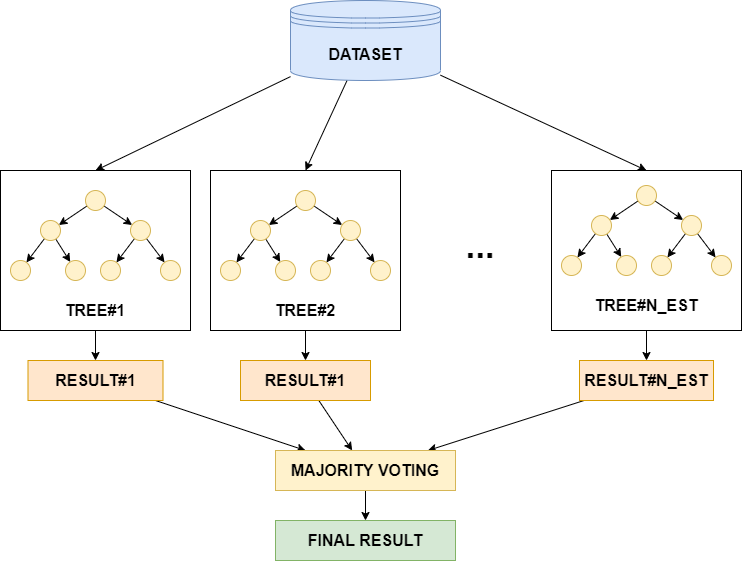

Sumber: Lab 4 KASDD Gasal 2023

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [224]:
# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(X_admission_train, Y_admission_train)

# Memprediksi data testing
predicted = rf_md.predict(X_admission_test)

# Menampilkan metrics
regression_metrics(predicted, Y_admission_test)

MAE: 0.050405714285714213
MSE: 0.004355055142857132
RMSE: 0.06599284160314005
R_squared: 0.6535464754387141


In [225]:
rf_red_paramless = RandomForestClassifier()
rf_red_paramless.fit(X_red_train, Y_red_train)

predicted = rf_red_paramless.predict(X_red_test)

classification_metrics(predicted, Y_red_test)

Accuracy: 0.8434108527131783
F1 Score: 0.8266497791821847
Recall Score: 0.8303556123441599
Precision Score: 0.8267296219984366


Terlihat bahwa terdapat perubahan pada metriknya.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan untuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [226]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

dt = DecisionTreeRegressor()
clf = GridSearchCV(estimator= dt,
                   param_grid=param_grid, cv= 5)

clf.fit(X_admission_train, Y_admission_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [227]:
clf.best_params_

{'criterion': 'absolute_error', 'max_depth': 12, 'min_samples_split': 50}

In [228]:
best_hp = DecisionTreeRegressor(**clf.best_params_)
best_hp.fit(X_admission_train, Y_admission_train)
predicted = best_hp.predict(X_admission_test)
regression_metrics(predicted, Y_admission_test)

MAE: 0.049857142857142864
MSE: 0.004924285714285716
RMSE: 0.070173254978558
R_squared: 0.6082630217761535


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

## BONUS ROUND: Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi CART dan sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 4 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Regression Case](https://www.kaggle.com/competitions/lab-4-regression-case?rvi=1)
*   [Kaggle Competition Classification Case](https://www.kaggle.com/competitions/lab-4-klasifikasi-kualitas-wine)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.


# Note for Corrector: Kode Bonus Kaggle ada dipaling bawah!  

# Latihan Soal

## SOAL 2 [10]

### SOAL 2a
[2.5] Bangun dan latih 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) dengan memberikan nilai pada *hyperparameter*:
- `max_depth = 4`
- `random_state = 2023`.

In [229]:

# Model Decision tree classifier red wine
dtc_red_new = DecisionTreeClassifier(max_depth=4, random_state=2023)
dtc_red_new.fit(X_red_train, Y_red_train)
print(dtc_red_new)

# Model Decision tree regressor admission
dtr_admission_new = DecisionTreeRegressor(max_depth=4, random_state=2023)
dtr_admission_new.fit(X_admission_train, Y_admission_train)
print(dtr_admission_new)

DecisionTreeClassifier(max_depth=4, random_state=2023)
DecisionTreeRegressor(max_depth=4, random_state=2023)


### SOAL 2b
[2.5]  Visualisasikan 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) yang didapat pada soal 1a!

In [230]:
# Visualize the Decision Tree Classifier (dtc_red_new)
print("Decision Tree Classifier - Red New:")
print(tree.export_text(dtc_red_new, feature_names=list(X_red_train.columns)))


# Visualize the Decision Tree Regressor (dtr_admission_new)
print("Decision Tree Regressor - Admission New:")
print(tree.export_text(dtr_admission_new, feature_names=list(X_admission_train.columns)))


Decision Tree Classifier - Red New:
|--- sulphates <= 0.64
|   |--- chlorides <= 0.11
|   |   |--- volatile acidity <= 0.75
|   |   |   |--- alcohol <= 9.81
|   |   |   |   |--- class: 5
|   |   |   |--- alcohol >  9.81
|   |   |   |   |--- class: 4
|   |   |--- volatile acidity >  0.75
|   |   |   |--- residual sugar <= 3.34
|   |   |   |   |--- class: 4
|   |   |   |--- residual sugar >  3.34
|   |   |   |   |--- class: 3
|   |--- chlorides >  0.11
|   |   |--- volatile acidity <= 0.59
|   |   |   |--- class: 6
|   |   |--- volatile acidity >  0.59
|   |   |   |--- fixed acidity <= 6.66
|   |   |   |   |--- class: 4
|   |   |   |--- fixed acidity >  6.66
|   |   |   |   |--- class: 3
|--- sulphates >  0.64
|   |--- alcohol <= 11.00
|   |   |--- alcohol <= 9.90
|   |   |   |--- total sulfur dioxide <= 48.83
|   |   |   |   |--- class: 3
|   |   |   |--- total sulfur dioxide >  48.83
|   |   |   |   |--- class: 4
|   |   |--- alcohol >  9.90
|   |   |   |--- free sulfur dioxide <= 5.95

### SOAL 2c

[2.5]  Jika model decision tree regressor diberikan data aktual Chance of Admit 0.96, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Absolute Error dari hasil prediksi dengan data aktual `Chance of Admit` dari data X?    

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

Dapat dilihat berdasarkan Decision Tree yang dibuat diatas dengan max depth 3 bahwa dengan diberikan beberapa atribut sebagai berikut:
- CGPA > 9.47
- Research > 0.5

Dimana dengan kedua konsiderasi kedua atribut tersebut, kita mendapatkan prediksi `chance of admit` sebesar 0.95. Oleh karena itu kita dapat menghitung Mean Absolute Error dari Chance of Admit tersebut:

---
MAE = \|| 0.95 - 0.96 || = 0.01
---

Maka kita temukan bahwa atribut-atribut yang menghasilkan hasil terdekat adalah CGPA yang lebih besar dari 9.47 dan Research yang lebih besar dari 0.5. Hasil prediksi dengan data aktual menghasilkan MAE bagi `Chance of Admit` sebesar 0.01.

### SOAL 2d

[2.5]  Untuk decision tree classifier, tentukan atribut-atribut dari suatu red wine yang paling berpotensi untuk dikategorikan sebagai kelas 4. Jika terdapat berbagai kemungkinan pasangan atribut yang paling berpotensi, cantumkanlah semua kemungkinan pasangan atribut tersebut.

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

Untuk menjawab pertanyaan ini, kita dapat menggunakan decision tree bagi red wine yang telah dibuat pada nomor 2b diatas. Terdapat beberapa atribut-atribut dari suatu red-wine yang paling berpotensi untuk dikategorikan sebagai kelas 4. Beberapa atribut yang diprediksi tersebut adalah:

Kemungkinan pertama:
- sulphates <= 0.64
- volatile acidity <= 0.75, dan
- alcohol > 9.91

Kemungkinan kedua:
- sulphates <= 0.64
- volatile acidity > 0.75
- chlorides <= 0.08
- total sulfur dioxide <= 34.50

Kemungkinan ketiga:
- sulphates <= 0.64
- volatile acidity > 0.75
- chlorides > 0.08
- total sulfur dioxide > 18.93

## SOAL 3 [15]

### SOAL 3a

[5] Implementasikan 2 model Random Forest (Random Forest Regressor untuk Admission Prediction dan Random Forest Classifier untuk Red Wine) Implementasi pada soal ini akan menggunakan nilai *hyperparameter*
- `max_depth = 3`
- `random_state = 2023`

In [231]:
# Regressor (Admission)
rf_md_new = RandomForestRegressor(max_depth = 3, random_state = 2023)
rf_md_new.fit(X_admission_train, Y_admission_train)
print(rf_md_new)

# Classifier (Red Wine)
rf_red_new = RandomForestClassifier(max_depth = 3, random_state = 2023)
rf_red_new.fit(X_red_train, Y_red_train)
print(rf_red_new)

RandomForestRegressor(max_depth=3, random_state=2023)
RandomForestClassifier(max_depth=3, random_state=2023)


### SOAL 3b

[5] Model Random Forest dianggap kurang dapat diinterpretasikan dibandingkan dengan Decision Tree. Apakah penyebab dari hasil tersebut?

Penyebab dari model random forest yang kurang dapat diinterpretasikan dibandingkan decision tree berada pada karakteristik random forest yang merupakan kumpulan decision tree yang dibuat. Sehingga apabila kita mencoba untuk mengintepretasikan random forest, kita perlu menganalisis sejumlah decision tree yang selanjutnya perlu digabungkan sehingga mendapatkan prediksi akhir.

Random forest berdasarkan namanya, memiliki intepretasi bahwa hasil yang diperoleh bersifat random sehingga membuat sulit dalam menjelaskan hasil dari random forest tersebut.

TIdak hanya itu, dengan menggunakan random forest, biasanya kita mengorbankan interpretabilitas demi meningkatkan akurasi dari prediksi yang kita buat. Oleh karena itu, proses penggunaan beberapa decision tree membuat random forest membutuhkan kemampuan lebih utnuk mengintepretasikan prediksinya.

### SOAL 3c

[5] Mekanisme voting dalam Random Forest Classifier adalah cara di mana model ini membuat prediksi akhir berdasarkan hasil dari beberapa Decision Tree yang membentuk ensemble-nya. Apakah yang membedakan mekanisme ini dengan mekanisme pengambil keputusan pada Decision Tree Classifier?

- Decision Tree Classifier: Decision Tree Classifier bekerja dengan hanya satu decision tree yang memisahkan data menjadi beberapa cabang berdasarkan aturan yang dibentuk oleh tree tersebut. Keputusan akhir diambil berdasarkan label mayoritas pada leave (node) terakhir di tree.

- Random Forest Classifier: Random Forest terdiri dari sejumlah Decision Tree yang dibuat secara independen. Setiap Decision Tree dilatih pada subset acak dari data (bagging) dengan fitur yang juga diambil secara acak. Ketika membuat prediksi, hasil dari semua Decision Tree di-ensamble dengan menggunakan berbagai metode, seperti "majority voting" (mengambil label mayoritas) untuk klasifikasi. Hasil dari voting ini menjadi prediksi akhir model.

## SOAL 4 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan regresi (Dataset Admission Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 2 dan 3.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai MAE, MSE, RMSE, dan $R^{2}$ dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi dari kedua model yang sudah didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [232]:
# Prediksi Regresi (menggunakan model yang dibangun sebelumnya)

# Memprediksi data testing menggunakan Decision Tree Regressor yang dibuat sebelumnya.
prediction_decision_tree = dtr_admission_new.predict(X_admission_test)

# Memprediksi data testing menggunakan Random Forest Regressor yang dibuat sebelumnya.
prediction_random_forest = rf_md_new.predict(X_admission_test)

# Regression Metrics untuk Decision Tree Regressor
print("Regression Metrics for Decision Tree Regressor: ")
regression_metrics(prediction_decision_tree, Y_admission_test)

# Regression Metrics untuk Random Forest Regressor
print("\nRegression Metrics for Random Forest Regressor: ")
regression_metrics(prediction_random_forest, Y_admission_test)

Regression Metrics for Decision Tree Regressor: 
MAE: 0.05600366240276015
MSE: 0.005049365737728059
RMSE: 0.07105888922385474
R_squared: 0.5983126506436818

Regression Metrics for Random Forest Regressor: 
MAE: 0.048486049383473416
MSE: 0.00405565400695748
RMSE: 0.06368401688773628
R_squared: 0.6773644468277138


- Mean Absolute Error (MAE): MAE mengukur besaran rata-rata dari kesalahan dalam satu set prediksi, tanpa mempertimbangkan arahnya. Ini adalah rata-rata dari sampel uji dari selisih absolut antara prediksi dan observasi aktual. Untuk kedua model, MAE relatif rendah. Namun, Random Forest Regressor memiliki MAE yang lebih rendah (0,04675975437005236) dibandingkan dengan Decision Tree Regressor (0,05238311376372414). Ini berarti bahwa, secara rata-rata, prediksi model Random Forest lebih mendekati nilai-nilai aktual.

- Mean Squared Error (MSE): MSE adalah metrik lain untuk mengevaluasi kinerja model regresi. Ini menghitung rata-rata selisih kuadrat antara nilai-nilai yang diprediksi dan aktual. Sama seperti MAE, model Random Forest memiliki MSE yang lebih rendah (0,0036388277258979527) dibandingkan dengan model Decision Tree (0,004409393965409966), menunjukkan bahwa model Random Forest umumnya membuat kesalahan yang lebih kecil dalam prediksi.

- Root Mean Squared Error (RMSE): RMSE adalah akar kuadrat dari MSE. Ini mengukur deviasi standar dari residu. Sama seperti MAE dan MSE, model Random Forest memiliki RMSE yang lebih rendah (0,06032269660665008) dibandingkan dengan model Decision Tree (0,06640326773141489). Ini berarti prediksi model Random Forest secara umum lebih akurat, dengan deviasi yang lebih kecil dari nilai-nilai aktual.

- R-squared: R-squared adalah ukuran statistik yang mewakili proporsi variasi untuk variabel dependen yang dijelaskan oleh variabel independen atau variabel dalam model regresi. Model Random Forest memiliki nilai R-squared yang lebih tinggi (0,7105238281594748) dibandingkan dengan model Decision Tree (0,6492237112080899), menunjukkan bahwa model Random Forest dapat menjelaskan lebih banyak variasi dalam variabel dependen.

Sebagai kesimpulan, berdasarkan perbandingan metrik-metrik ini, model Regressor Random Forest memiliki kinerja yang lebih baik dalam kasus ini. Hal ini mungkin disebabkan oleh sifat intrinsik Random Forest untuk mengurangi overfitting dengan melakukan pengukuran hasil dari sejumlah Decision Tree, sehingga meningkatkan kemampuan model untuk generalisasi data baru.

## SOAL 5 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan klasifikasi (Dataset Red Wine Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 2 dan 3.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai Accuracy, Precision, Recall, dan F1-Score dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [233]:
# Prediksi Classification (menggunakan model yang dibangun sebelumnya)

# Memprediksi data testing menggunakan Decision Tree Classifier yang dibuat sebelumnya.
prediction_decision_tree = dtc_red_new.predict(X_red_test)

# Memprediksi data testing menggunakan Random Forest Classifier yang dibuat sebelumnya.
prediction_random_forest = rf_red_new.predict(X_red_test)

# Regression Metrics untuk Decision Tree Classifier
print("Classification Metrics for Decision Tree Classifier: ")
classification_metrics(prediction_decision_tree, Y_red_test)

# Regression Metrics untuk Random Forest Classifier
print("\nClassification Metrics for Random Forest Classifier: ")
classification_metrics(prediction_random_forest, Y_red_test)

Classification Metrics for Decision Tree Classifier: 
Accuracy: 0.5147286821705427
F1 Score: 0.4446089924384898
Recall Score: 0.486899110104984
Precision Score: 0.4693888961323167

Classification Metrics for Random Forest Classifier: 
Accuracy: 0.6294573643410852
F1 Score: 0.5845519863825724
Recall Score: 0.6059043716708995
Precision Score: 0.5970107988159353


Note: Sensitivitas = Recall

- Accuracy adalah rasio dari jumlah prediksi yang benar terhadap jumlah total sampel input. Accuracy bekerja dengan baik hanya jika ada jumlah sampel yang sama yang termasuk dalam setiap kelas. Untuk kedua model, Random Forest Classifier memiliki akurasi yang lebih tinggi (0.6512968299711815) dibandingkan dengan Decision Tree Classifier (0.547550432276657). Ini menunjukkan bahwa model Random Forest lebih baik dalam mengklasifikasikan sampel dengan benar.

- F1 Score adalah rata-rata tertimbang dari Presisi dan Sensitivitas. Oleh karena itu, skor ini memperhitungkan baik false positive maupun false negative. Skor ini cocok untuk masalah distribusi kelas yang tidak merata. Random Forest Classifier memiliki F1 Score yang lebih tinggi (0.6227973091612683) daripada Decision Tree Classifier (0.5254864746472852), menunjukkan bahwa ia memiliki keseimbangan presisi dan sensitivitas yang lebih baik.

- Recall adalah rasio dari pengamatan positif yang diprediksi dengan benar terhadap semua pengamatan di kelas aktual. Model Random Forest memiliki skor sensitivitas yang lebih tinggi (0.6338696752466619) daripada model Decision Tree (0.5342889893523375), yang berarti model Random Forest lebih baik dalam mengidentifikasi sampel positif.

- Precision adalah rasio dari pengamatan positif yang diprediksi dengan benar terhadap total prediksi positif. Sekali lagi, model Random Forest memiliki skor precision yang lebih tinggi (0.6374558760049339) daripada model Decision Tree (0.5439859428201052). Ini berarti model Random Forest lebih baik dalam memprediksi sampel positif dengan benar, dan memiliki lebih sedikit false positive.

Oleh karena itu dapat dilihat bahwa random forest dapat membuat prediksi yang sedikit lebih akurat dibandingkan satu decision tree. Hal ini disebabkan akibat random forest melakukan proses ensemble sehingga mendapatkan mayoritas data dengan baik.

## SOAL 6 [15]

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier.

### SOAL 6a
[9]
Proses Grid search diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split**.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

In [234]:
#Random Forest Regressor

param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, 16, 18]}

rf_regressor = RandomForestRegressor()
clf_rf_regressor = GridSearchCV(estimator= rf_regressor,
                   param_grid=param_grid, cv= 5)

clf_rf_regressor.fit(X_admission_train, Y_admission_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, 16, 18],
                         'min_samples_split': [10, 20, 50]})

In [235]:
#Decision Tree Regressor

param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, 16, 18]}

dt_regressor = DecisionTreeRegressor()
clf_dt_regressor = GridSearchCV(estimator= dt_regressor,
                   param_grid=param_grid, cv= 5)

clf_dt_regressor.fit(X_admission_train, Y_admission_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, 16, 18],
                         'min_samples_split': [10, 20, 50]})

In [236]:
#Random Forest Classification

param_grid = {'criterion': ["gini", "entropy", "log_loss"],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, 16, 18]}

rf_classifier = RandomForestClassifier()
clf_rf_classifier = GridSearchCV(estimator= rf_classifier,
                   param_grid=param_grid, cv= 5)

clf_rf_classifier.fit(X_red_train, Y_red_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 12, 16, 18],
                         'min_samples_split': [10, 20, 50]})

In [237]:
#Decision Tree Classification

param_grid = {'criterion': ["gini", "entropy", "log_loss"],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, 16, 18]}

dt_classifier = DecisionTreeClassifier()
clf_dt_classifier = GridSearchCV(estimator=dt_classifier,
                   param_grid=param_grid, cv= 5)

clf_dt_classifier.fit(X_red_train, Y_red_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 12, 16, 18],
                         'min_samples_split': [10, 20, 50]})

### SOAL 6b
[1]

Tampilkan hyperparameter terbaik yang kalian dapatkan dari proses Grid Search untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier dari nomor 5a.

In [238]:
# Best Hyperparamter from grid search Random Forest Regressor

clf_rf_regressor.best_params_

{'criterion': 'absolute_error', 'max_depth': 16, 'min_samples_split': 20}

In [239]:
# Best Hyperparamter from grid search Decison Tree Regressor

clf_dt_regressor.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 50}

In [240]:
# Best Hyperparamter from grid search Random Forest Classifier

clf_rf_classifier.best_params_

{'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 10}

In [241]:
# Best Hyperparamter from grid search Decison Tree Classifier

clf_dt_classifier.best_params_

{'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 10}

### SOAL 6c
[2.5]

Buatlah 2 model Random Forest (Random Forest Classifier dan Random Forest Regressor) dan 2 model Decision Tree (Decision Tree Classifier dan Decision Tree Regressor) berdasarkan hyperparameter yang kalian dapatkan dari **soal 5a**

In [242]:
# Random Forest Regressor Model

best_hp_rf_regression = RandomForestRegressor(**clf_rf_regressor.best_params_)
best_hp_rf_regression.fit(X_admission_train, Y_admission_train)

RandomForestRegressor(criterion='absolute_error', max_depth=16,
                      min_samples_split=20)

In [243]:
# Decison Tree Regressor Model

best_hp_dt_regression = DecisionTreeRegressor(**clf_dt_regressor.best_params_)
best_hp_dt_regression.fit(X_admission_train, Y_admission_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=50)

In [244]:
# Random Forest Classifier Model

best_hp_rf_classifier = RandomForestClassifier(**clf_rf_classifier.best_params_)
best_hp_rf_classifier.fit(X_red_train, Y_red_train)

RandomForestClassifier(max_depth=16, min_samples_split=10)

In [245]:
# Decison Tree Classifier Model

best_hp_dt_classifier = DecisionTreeClassifier(**clf_dt_classifier.best_params_)
best_hp_dt_classifier.fit(X_red_train, Y_red_train)

DecisionTreeClassifier(max_depth=16, min_samples_split=10)

### SOAL 6d
[2.5]

Lakukan 4 buah prediksi (karena terdapat 4 model) dengan X_test dari masing-masing dataset dan **munculkan** hasil evaluasi terhadap label y_test dari masing-masing dataset.

**Note**: Terdapat 2 function metrics, yakni `regression_metrics` dan `classification_metrics`.


In [246]:
predicted = best_hp_rf_regression.predict(X_admission_test)
regression_metrics(predicted, Y_admission_test)

MAE: 0.05035571428571429
MSE: 0.004374832214285717
RMSE: 0.06614251442367244
R_squared: 0.6519731690448396


In [247]:
predicted = best_hp_dt_regression.predict(X_admission_test)
regression_metrics(predicted, Y_admission_test)

MAE: 0.05892515006002402
MSE: 0.0056308630141225485
RMSE: 0.0750390765809558
R_squared: 0.5520533555667679


In [248]:
predicted = best_hp_rf_classifier.predict(X_red_test)
classification_metrics(predicted, Y_red_test)

Accuracy: 0.8372093023255814
F1 Score: 0.8202881715601625
Recall Score: 0.8241457002242667
Precision Score: 0.8209934405109246


In [249]:
predicted = best_hp_dt_classifier.predict(X_red_test)
classification_metrics(predicted, Y_red_test)

Accuracy: 0.7286821705426356
F1 Score: 0.7103503428138711
Recall Score: 0.7138633273363947
Precision Score: 0.7092851030853788


## SOAL 7 [5]
1. [2] Jelaskan konsep bootstrapping dalam konteks Random Forests. Bagaimana hal ini berkontribusi pada keragaman dari berbagai decision trees yang terbentuk?

Bootstrapping dalam konteks random forest melakukan beberapa step seperti berikut:
- Bootstrapping Dataset: Untuk setiap decision tree yang akan dibuat dalam Random Forest, dataset pelatihan asli diambil secara acak dengan penggantian. Ini berarti bahwa dalam setiap dataset pelatihan untuk decision tree tersebut, beberapa contoh data akan muncul lebih dari sekali, sementara yang lain mungkin tidak muncul sama sekali.

Setelah bootstrapping selesai, biasanya random forest akan melakukan step seperti berikut:
- Pembentukan Decision Trees: Setiap decision tree dalam Random Forest kemudian dibentuk dengan menggunakan dataset pelatihan bootstrapped yang unik.

- Aggregasi Hasil: Setelah semua decision trees telah dibuat, hasil prediksi dari setiap tree digabungkan untuk menghasilkan prediksi akhir. Dalam masalah regresi, ini bisa berarti mengambil rata-rata prediksi dari semua decision trees, sedangkan dalam masalah klasifikasi, ini bisa berarti mengambil mayoritas dari prediksi mereka.

Bootstrapping berkontribusi pada keragaman berbagai decision tree pada random forest:

- Variasi dalam dataset: Dengan menggunakan bootstrapping, setiap decision tree dilatih pada dataset yang sedikit berbeda. Sebagian besar contoh data akan ada dalam setiap dataset, tetapi ada juga elemen acak dalam setiap salinan. Ini menciptakan variasi dalam decision tree yang dihasilkan.

- Pengurangan overfitting: Karena setiap decision tree melihat dataset yang berbeda, masing-masing cenderung mengambil pola yang berbeda dari data pelatihan. Ini membantu mengurangi overfitting, di mana decision tree mungkin terlalu cocok dengan data pelatihan khusus, tetapi tidak umum. Dengan demikian, bootstrapping membantu memperbaiki generalisasi model.

2. [1] Bagaimana prediksi dari seluruh Decision Tree Regressor digabungkan dalam Random Forest Regressor?

Answer: Biasanya random forest akan menggunakan rata-rata prediksi dari semua decision tree sehingga menemukan prediksi yang cocok menampilkan prediksi kita.

3. [2] Jelaskanlah bagaimana Random Forest dapat digunakan untuk masalah klasifikasi multi-kelas, seperti pada kasus prediksi kelas Red Wine pada Lab 4 ini.

- Bootstrapping: Random Forest menggunakan bootstrapping, yang merupakan teknik pengambilan sampel dengan penggantian, untuk menciptakan variasi dalam dataset training yang digunakan oleh setiap decision tree.
- Pembentukan Decision Trees: Setiap decision tree dalam Random Forest dibentuk menggunakan dataset training yang diberikan.
Prediksi Klasifikasi: Setelah semua decision trees dalam Random Forest telah dibuat, hasil prediksi dari setiap tree digabungkan untuk menghasilkan prediksi akhir untuk masalah klasifikasi multi-kelas. Ada beberapa metode untuk melakukan ini, tetapi yang paling umum adalah:
 > Majority Voting: Untuk setiap sampel data, setiap decision tree memberikan prediksi kelas. Prediksi akhir dihitung dengan mengambil mayoritas dari prediksi ini. Kelas dengan jumlah prediksi terbanyak menjadi kelas yang dipilih sebagai prediksi akhir.
- Evaluasi Model: Setelah mendapatkan prediksi akhir, kita mengukur kinerja model menggunakan method classification_metrics yang memberikan nilai dari  akurasi, presisi, recall, F1-score.

## SOAL 8 [5]

1. [2.5] Random Forest memasukkan unsur *randomness* melalui bootstrapping dan *feature selection*. Bagaimanakah hal ini dapat memengaruhi reproduksibilitas hasil, dan apa yang dapat dilakukan untuk memastikan *output* yang konsisten?

  ##### Melalui sisi Bootstrapping
  - Bootstrapping adalah proses di mana setiap decision tree dalam Random Forest dibangun dari sampel data yang diambil secara acak dari training dataset dengan penggantian. Tentu saja, tanpa melakukan suatu cara maka hasil prediksi ini akan berbeda karena pemilihan random dataset yang berbeda-beda setiap kali dijalankan. Oleh karena itu, cara untuk memastikan reproduksibilitas dengan bootstrapping adalah dengan mengatur random state yang sama sebelum melatih model. Melalui random state ini kita dapat memastikan bahwa hasil prediksi yang diperoleh akan konsisten.  

  ##### Melalui Feature Selection
  - Setiap kali decision tree dalam Random Forest memilih fitur untuk membagi node, hanya sebagian kecil fitur yang diambil dalam pertimbangan. Ini juga memperkenalkan unsur randomness dalam pembentukan setiap pohon. Oleh karena itu, tentu saja apabila kita tidak melakukan spesifikasi fitur-fitur yang diambil maka hal ini akan mempengaruhi reproduksibilitas hasil. Oleh karena itu, kita dapat memastikan bahwa parameter yang mengatur bagaimana fitur dipilih (misalnya, jumlah maksimum fitur yang akan dipertimbangkan dalam setiap pemisahan node) tetap sama.

2. [2.5] Apakah *scaling* atau *feature normalization* diperlukan untuk Random Forest? Mengapa atau mengapa tidak?

- Random Forest adalah salah satu algoritma machine learning yang cenderung tidak memerlukan scaling atau feature normalization. Hal ini karena Random Forest bekerja dengan membagi data ke dalam decision tree dan menggunakan beberapa decision tree (ensemble) untuk membuat prediksi. Tidak hanya itu, setiap decision tree dibuat berdasarkan subset acak dari fitur-fitur, perbedaan dalam skala atau normalisasi fitur-fitur biasanya tidak memengaruhi hasil secara signifikan.

- Lebih dari itu, karena dalam random forest tidak ada perhitungan jarak seperti algoritma lain seperti KNN, maka perbedaan yang harusnya dilakukan scaling ini tidak terlalu relevan.   



# Kaggle Bonus Code

In [250]:
admission_test = pd.read_csv('admission_test.csv')

df_test = admission_test[['Id']].copy()
X_test_admission_kaggle = admission_test.drop(columns=['Id', 'Serial No.'])

prediction = best_hp_rf_regression.predict(X_test_admission_kaggle)

df_test['Chance Of Admit'] = prediction

df_test.to_csv('admission_kaggle.csv', index=False)

In [251]:
red_wine_test = pd.read_csv('Red_Wine_Quality_Test.csv')

df_test = red_wine_test[['Id']].copy()
X_test_red_kaggle = red_wine_test.drop(columns=['Id'])

prediction = best_hp_rf_classifier.predict(X_test_red_kaggle)

df_test['quality'] = prediction

df_test.to_csv('wine_test.csv', index=False)